In [6]:
import pandas as pd

spam_df = pd.read_csv("data/spamhamdata.csv", sep="\t", header=None)

spam_df.head(5)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam_df.columns = ["Labels", "Messages"]

In [8]:
spam_df.head(5)

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Cleaning and text preprocessing

In [9]:
from nltk.corpus import stopwords

custom_stopwords = ["aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
                    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
                    'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
                    "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
                    'wouldn', "wouldn't"
                   ]

In [10]:
import re
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer() #Instantiated the class PorterStemmer to have the object 'ps'

'read'

In [12]:
len(spam_df)

5572

In [16]:
text = re.sub('[^a-zA-Z0-9]', " ", "I am 19 years old, & I am a boy")
print(text.lower().split())

['i', 'am', '19', 'years', 'old', 'i', 'am', 'a', 'boy']


In [17]:
corpus = []

for i in range(0, len(spam_df)): #loop from 0 to the len of our dataframe
    review = re.sub('[^a-zA-Z0-9]', " ", spam_df['Messages'][i]) # remove all non alphabetic symbols
    review = review.lower() #convert all letters to lower alphabetics
    review = review.split() # split words to return a list of words
    review = [ps.stem(word) for word in review if not word in custom_stopwords] # returns all root words
    review = " ".join(review) #Join on whitespace
    corpus.append(review)
print(corpus)

['go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat', 'ok lar joke wif u oni', 'free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005 text fa to 87121 to receiv entri question std txt rate t c s appli 08452810075over18 s', 'u dun say so earli hor u c alreadi then say', 'nah i don t think he goe to usf he live around here though', 'freemsg hey there darl it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chg to send 1 50 to rcv', 'even my brother is not like to speak with me they treat me like aid patent', 'as per your request mell mell oru minnaminungint nurungu vettam ha been set as your callertun for all caller press 9 to copi your friend callertun', 'winner as a valu network custom you have been select to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour onli', 'had your mobil 11 month or more u r entitl to updat to the latest colour mobil with camera 

In [20]:
spam_df["Labels"].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

y = spam_df['Labels']
y = y.map({"spam": 1, "ham" : 0})
print(y)
y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(corpus,y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64


In [21]:
spam_df["Labels"].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

In [22]:
### creating BOW(Bag of words)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=2000, ngram_range=(1,2), binary=True)

X_train = tf_idf.fit_transform(X_train).toarray()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_test = tf_idf.transform(X_test).toarray()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [24]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train) #This is where we train our model

LogisticRegression()

In [26]:
train_score = log_reg.score(X_train, y_train) # This is wehere we check for the accuracy score

print("Train score is", train_score*100)

Train score is 98.40700022436617


In [31]:
test_score = log_reg.score(X_test, y_test)

print("Test score is", test_score*100)

Test score is 97.30941704035875


In [32]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_recall_curve, precision_score

y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)
print(f"y_pred is \n {y_pred}")
print(f"y_train_pred is \n {y_train_pred}")

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

F1_score = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"F1 Score: {F1_score}")
print("+++++" * 30)
print(f"Classification Report: \n {class_report}")

y_pred is 
 [0 0 0 ... 0 0 0]
y_train_pred is 
 [0 0 0 ... 1 1 0]
F1 Score: 0.8880597014925372
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



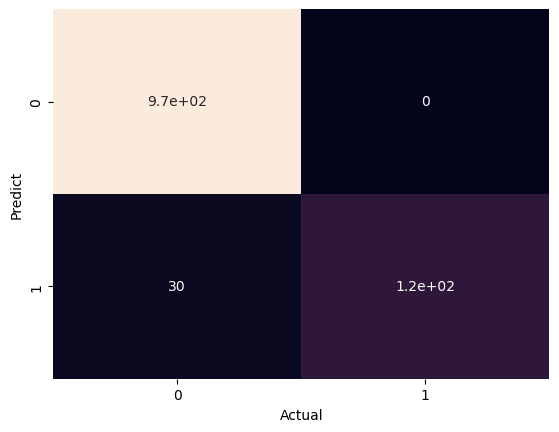

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = log_reg.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cbar=False)
plt.ylabel("Predict")
plt.xlabel("Actual")
plt.savefig('confusion_matrix.png')
plt.show()

In [38]:
email = [input("Enter your email here>>>> \n")]

email = tf_idf.transform(email).toarray()
pred = log_reg.predict(email)
if pred[0] == 0:
    print("The model predicts Ham")
else:
    print("The model predicts Spam")

The model predicts Spam


###### To make a better prediction, we shall write a function cleanse user taken input

In [23]:
import contractions
import string

In [24]:
def preprocess(text):
    corpus = []
    text = re.sub('[^a-zA-Z0-9]', " ", text)
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    text = url_pattern.sub(r"", text)
    text = text.lower()
    text = contractions.fix(text, slang=True)
    text = string.punctuation
    text = text.translate(str.maketrans("", "", text))
    text = text.split()
    text = [ps.stem(word) for word in text if not word in custom_stopwords]
    text = " ".join(text)
    corpus.append(text)
    return corpus

In [27]:
email = input("Enter your email here>>>> \n")

corpus = preprocess(email)

In [28]:
email = tf_idf.transform(corpus).toarray()
pred = log_reg.predict(email)
if pred[0] == 0:
    print("The model predicts ham")
else:
    print("The model predicts spam")

The model predicts ham


In [29]:
import pickle

with open("tf_idf.pickle", "wb") as tf_idf_file:
    pickle.dump(tf_idf, tf_idf_file)

In [30]:
with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocess, preprocessor_file)

with open("log_reg.pkl", "wb") as log_reg_model:
    pickle.dump(log_reg, log_reg_model)